Задание 1.2.1

In [ ]:
def sum_range(start, end):
  if start > end:
    end, start = start, end
  return sum(range(start, end+1))

print(sum_range(2,12))
print(sum_range(-4,4))
print(sum_range(3,2))

Задание 1.2.2

In [ ]:
def fact(num):
  if num == 0:
    return 1
  else:
    return num*fact(num-1)

print(fact(5))

Задание 1.2.3

In [ ]:
import numpy as np
def euclidean_distance(v1, v2):
  return sum((x-y)**2 for x, y in zip(v1,v2))**0.5

x = np.array([0,0,0])
y = np.array([3,3,3])
print(euclidean_distance(x,y))

Задание 1.2.4

In [ ]:
def sqr_euclidean_distance(v1, v2):
  return sum((x-y)**2 for x,y in zip(v1,v2))

def weight_euclidean_distance(v1,v2,w):
  return sum((x-y)**2*s for x,y,s in zip(v1,v2,w))**0.5

def manhattan_distance(v1,v2):
  return sum(abs(x-y) for x,y in zip(v1,v2))

def chebushev_distance(v1,v2):
  return max(abs(x-y) for x,y in zip(v1,v2))

x = np.array([0,0,0])
y = np.array([3,3,3])
w = np.array([0,0,1])

print(sqr_euclidean_distance(x,y))
print(weight_euclidean_distance(x,y,w))
print(manhattan_distance(x,y))
print(chebushev_distance(x,y))

Задание 1.2.5

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

ax.scatter(0,0,0)
ax.scatter(3,3,3)
plt.show()

Задание 1.2.6

In [ ]:
import numpy as np

#Расстояние Евклида
print(np.linalg.norm(x-y))
#Квадрат Евклидова расстояния
print(np.linalg.norm(x-y)**2)
#Расстояние Чебышева
print(np.linalg.norm(p1-p2, ord=np.inf))
#Расстояние Хемминга
print(np.linalg.norm(p1-p2, ord=1))

Задание 1.3.1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


points = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [10, 11, 12]])


distances_euclidean = np.linalg.norm(points[1:] - points[:-1], axis=1)

distance_euclidean_pow = np.linalg.norm((points[1:] - points[:-1])**2, axis=1)

distances_chebyshev = np.max(np.abs(points[1:] - points[:-1]), axis=1)

distances_manhattan = np.sum(np.abs(points[1:] - points[:-1]), axis=1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(points)):
    ax.scatter(points[i][0], points[i][1], points[i][2], color='b', s=100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

print("Расстояния по евклидовой метрике:", distances_euclidean)
print("Расстояние квадратное по евклидовой метрике", distance_euclidean_pow)
print("Расстояния по метрике Чебышева:", distances_chebyshev)
print("Расстояния по манхэттенской метрике:", distances_manhattan)

Задание 1.3.2

In [ ]:
import numpy as np

z = np.zeros((5,5))
z += np.arange(5)
print(z)

Задание 2.2.1

In [ ]:
from sklearn.neighbors import KNeighboursClassifier
import numpy as np

x = np.array([[-1,-1], [-2,-1], [-3,-2], [1,1], [2,1], [3,2]])
target = [0,0,0,1,1]

k = 3
model = KNeighboursClassifier(n_neighbors = k)
model.fit(x, target)
print(model)

print("(-2,-2) is class")
print(model.predict([[-2,-2]]))
print("(1,3) is class")
print(model.predict([[1,3]]))

Задание 2.2.2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset("iris")
iris

Задание 2.2.3

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

iris = sns.load_dataset("iris")
iris

plt.figure(figsize=(16,7))
plt.subplot(121)
sns.scatterplot(
    data=iris,
    x='petal_width',y='petal_length',
    hue='species',
    s=70)
plt.xlabel('Длина лепестка, cм')
plt.ylabel('Ширина лепестка, cм')
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(
    data=iris,
    x='sepal_width',y='sepal_length',
    hue='species',
    s=70)
plt.xlabel('Длина чашелистика, cм')
plt.ylabel('Ширина чашелистика, cм')
plt.legend()
plt.grid()

Задание 2.2.4

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1],
    iris.iloc[:,-1],
    test_size = 0.20
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

plt.figure(figsize=(10,10))
sns.scatterplot(x='petal_width',y='petal_length',data=iris,hue ='species',s=70)
plt.xlabel('Длина лепестка, cм')
plt.ylabel('Ширина лепестка, cм')
plt.legend(loc=2)
plt.grid()
for i in range(len(y_test)):
  if np.array(y_test)[i] != y_pred[i]:
    plt.scatter(X_test.iloc[i,3],X_test.iloc[i,2], color='red',s=150)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred):.3}')

Задание 2.3.1

accuracy: 0.957


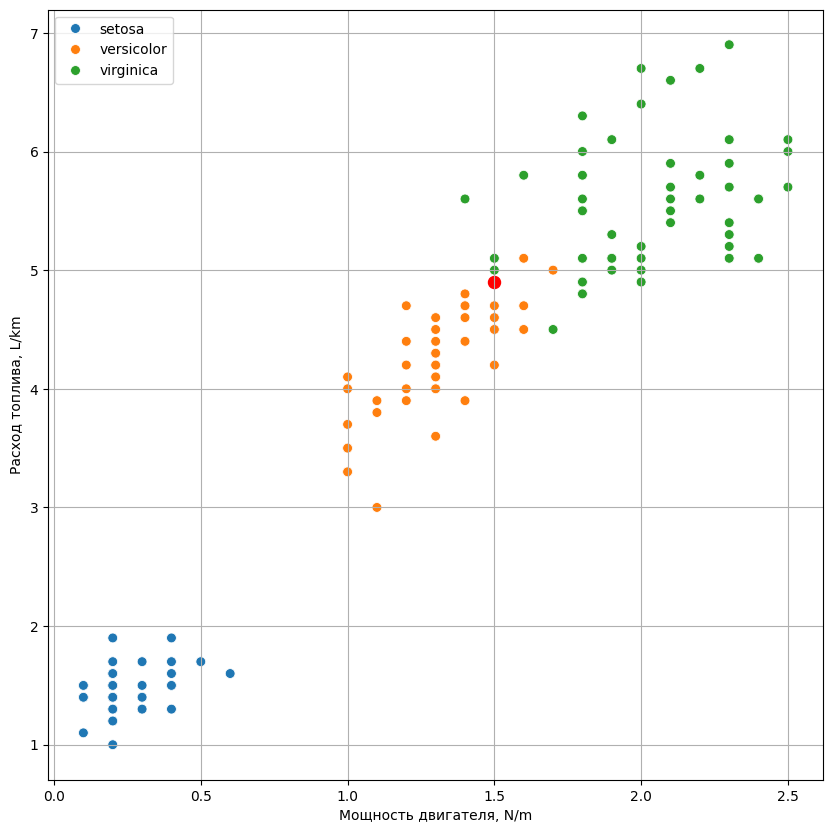

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1],
    iris.iloc[:,-1],
    test_size = 0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
X_train.head()
y_train.head()
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred

plt.figure(figsize=(10,10))
sns.scatterplot(x='petal_width',y='petal_length',data=iris,hue ='species',s=50)
plt.xlabel('Мощность двигателя, N/m')
plt.ylabel('Расход топлива, L/km')
plt.legend(loc=2)
plt.grid()
for i in range(len(y_test)):
  if np.array(y_test)[i] != y_pred[i]:
    plt.scatter(X_test.iloc[i,3],X_test.iloc[i,2], color='red',s=75)

from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred):.3}')

Здание 3.2.1

In [ ]:
import pandas as pd
dataframe = pd.DataFrame({'Оценка':['низкая','средняя','средняя','высокая']})
scale_mapper = {'низкая':1,'средняя':2,'высокая':3}
dataframe['Оценка'].replace(scale_mapper)

Задание 3.2.2

In [ ]:
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"красный": 2, "синий": 4},
             {"красный": 4, "синий": 3},
             {"красный": 1, "желтый": 2},
             {"красный": 2, "желтый": 2}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features

Задание 3.3.2

In [ ]:
from sklearn.feature_extraction import DictVectorizer
data_dict = [{"карий": 1, "синий": 8},
             {"зеленый": 2, "синий": 4},
             {"белый": 3, "желтый": 2},
             {"зеленый": 2, "карий": 5}]
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(data_dict)
features